# Trabalho prático 1

## Exercício 1

In [71]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as clr
import numpy as np
import copy
import cv2
import scipy.fftpack as fft
import math as m

In [72]:
img1 = Image.open('./imagens/peppers.bmp')
img1 = img1.convert('RGB')
img1.save('./imagens/peppers_compressed_ultra_high.jpg', quality=100)
img1.save('./imagens/peppers_compressed_high.jpg', quality=75)
img1.save('./imagens/peppers_compressed_medium.jpg', quality=50)
img1.save('./imagens/peppers_compressed_low.jpg', quality=25)

img2 = Image.open('./imagens/logo.bmp')
img2 = img2.convert('RGB')
img2.save('./imagens/logo_compressed_ultra_high.jpg', quality=100)
img2.save('./imagens/logo_compressed_high.jpg', quality=75)
img2.save('./imagens/logo_compressed_medium.jpg', quality=50)
img2.save('./imagens/logo_compressed_low.jpg', quality=25)

img3 = Image.open('./imagens/barn_mountains.bmp')
img3 = img3.convert('RGB')
img3.save('./imagens/barn_mountains_compressed_ultra_high.jpg', quality=100)
img3.save('./imagens/barn_mountains_compressed_high.jpg', quality=75)
img3.save('./imagens/barn_mountains_compressed_medium.jpg', quality=50)
img3.save('./imagens/barn_mountains_compressed_low.jpg', quality=25)

In [73]:
def compress_graph(image_name):
    img = Image.open(f'./imagens/{image_name}').convert('RGB')
    quality = []
    size = []
    for i in range(100, -1, -1):
        img.save(f'./imagens/animations/{image_name}_{i}.jpg', quality=i)
        quality.append(i)
    
    for i in range(100, -1, -1):
        size.append(os.path.getsize(f'./imagens/animations/{image_name}_{i}.jpg')/1000)
    
    images = []

    for i in range(100, -1, -1):
        img = Image.open(f'./imagens/animations/{image_name}_{i}.jpg')
        images.append(img)

    images[0].save(f'./imagens/{image_name}.gif', save_all=True, append_images=images[1:], optimize=False, duration=2)

    plt.figure()
    plt.title(f'Relação entre qualidade e o tamanho da compressão JPG de: {image_name}')
    plt.plot(quality, size)
    plt.xlabel('Quality')
    plt.ylabel('Size (KB)')
    plt.show()

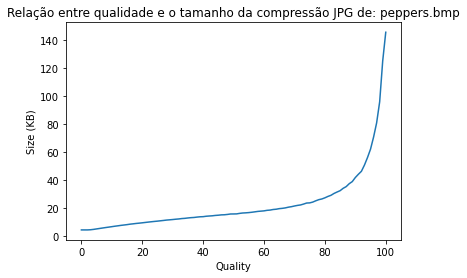

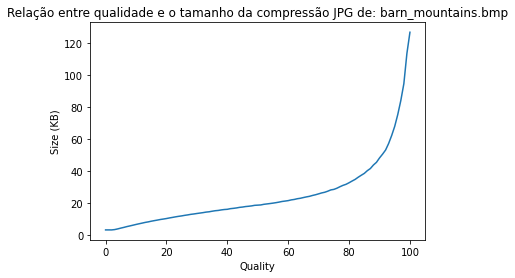

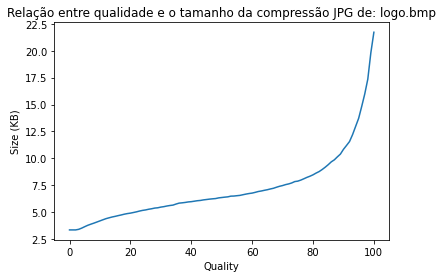

In [74]:
compress_graph('peppers.bmp')
compress_graph('barn_mountains.bmp')
compress_graph('logo.bmp')

### Resultados e Conclusões

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/logo.bmp' width=400 heigh=200/> |<img src='imagens/logo_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/logo_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/logo_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/logo_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/logo.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 |
| Size (KB) | 422KB | 22KB |64KB| 7KB| 6KB | --- |
| Compression Rate | --- | 94.79% | 98,10% | 98.34% | 98,58% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/peppers.bmp' width=400 heigh=200/> |<img src='imagens/peppers_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/peppers_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/peppers_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/peppers_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/peppers.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 |
| Size (KB) | 577KB | 142KB |24KB | 16KB | 11KB| --- |
| Compression Rate | --- | 75.39% | 95,85% | 97,23% | 98,09% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/barn_mountains.bmp' width=400 heigh=200/> |<img src='imagens/barn_mountains_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/barn_mountains_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/barn_mountains_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/barn_mountains_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/barn_mountains.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 |
| Size (KB) | 349KB| 124KB | 28KB | 19KB | 12KB | --- |
| Compression Rate | --- | 64.47% | 91.98% | 94.56% | 96.56% | --- |

A imagem logo.bmp, mesmo com uma qualidade alta (75%), já apresenta uma leve distorção no contorno das figuras e, à medida que a qualidade diminui, esta distorção vai ficando cada vez mais evidente. A razão pela qual podemos verificar ruído com uma qualidade de compressão alta, deve-se ao facto de existir um elevado contraste entre as tonalidades das formas e o fundo (só existem três cores com apenas uma tonalidade cada uma).

Na imagem peppers.bmp, apenas começam a ser perceptíveis perturbações a partir da qualidade média (50%). A razão para tal provém da imagem conter transições mais suaves em comparação com a imagem logo.bmp.

Por fim, na imagem barn_mountains.bmp, não existe uma discrepância da qualidade visual tão saliente entre todos os níveis de compressão uma vez que esta tem essencialmente transições suaves. No entanto, é possível distiguir-se algumas zonas pixelizadas quando a qualidade de compressão é baixa.

De um modo geral, as imagens foto-realistas, como é o caso da peppers.bmp e da barn_mountains.bmp, conseguem alcançar maiores taxas de compressão sem grande perda percetual. Estes resultados encontram-se de acordo com o esperado pois sabemos que o JPEG utiliza métodos de compressão pensados para imagens foto-realistas.

## Exercício 3

In [75]:
## read image
def read_image(image_name):
    image = np.array(plt.imread(image_name))
    return image


In [76]:
## create colormap
def create_colormap(color_list, name='cmap'):
    return clr.LinearSegmentedColormap.from_list(name, color_list, N=256)


In [77]:
graymap = create_colormap(['black', 'white'], 'blackwhite')

In [78]:
def plot_image(image, colormap=graymap, title=""):
    plt.figure() 
    plt.title(title)
    plt.imshow(image, colormap)
    #plt.axis('off')
    plt.show()

In [79]:
def plot_image_colorbar(image, title=''):
    plt.figure()
    plt.title(title)
    plt.imshow(image, graymap)
    plt.colorbar()
    plt.show()

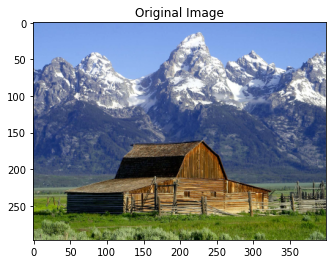

In [80]:
image = read_image('./imagens/barn_mountains.bmp')
size = image.shape
plot_image(image, title="Original Image")

In [81]:
red_map = create_colormap(['black', 'red'], 'redmap')
green_map = create_colormap(['black', 'green'], 'greenmap')
blue_map = create_colormap(['black', 'blue'], 'bluemap')
random_map = create_colormap(['blue', 'orange', 'pink'], 'randommap')

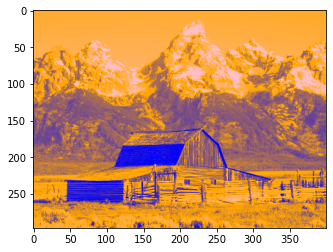

In [82]:
plot_image(image[:, :, 1], random_map)

In [83]:
def get_image_rgb(image):
    return np.array((image[:, :, 0], image[:, :, 1], image[:, :, 2]))

In [84]:
def get_image_from_channels(channels):
    lines, columns = channels[0].shape
    img = np.zeros((lines, columns, 3), dtype=np.uint8)
    img[:, :, 0] = channels[0]
    img[:, :, 1] = channels[1]
    img[:, :, 2] = channels[2]
    return img

(3, 297, 400)


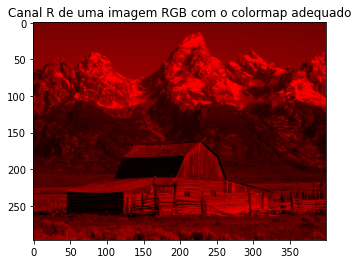

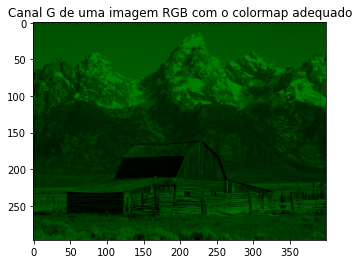

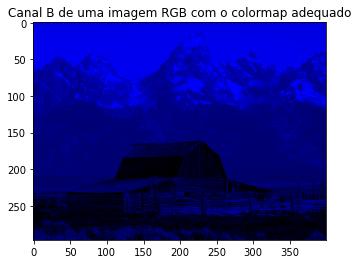

In [85]:
img_rgb = get_image_rgb(image)
print(img_rgb.shape)
plot_image(img_rgb[0], red_map, 'Canal R de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[1], green_map, 'Canal G de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[2], blue_map, 'Canal B de uma imagem RGB com o colormap adequado')

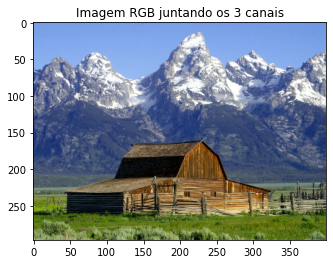

In [86]:
plot_image(get_image_from_channels(img_rgb), title='Imagem RGB juntando os 3 canais')

# Exercicio 4

In [87]:
def add_padding(image, padding=16):
    rows, columns, _ = image.shape
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]

    # add rows
    if rows % padding != 0:
        rows_to_add = padding - rows % padding

        aux_red = np.tile(red[-1, :], (rows_to_add, 1))
        aux_green = np.tile(green[-1, :], (rows_to_add, 1))
        aux_blue = np.tile(blue[-1, :], (rows_to_add, 1))

        red = np.vstack([red, aux_red])
        green = np.vstack([green, aux_green])
        blue = np.vstack([blue, aux_blue])
    
    # add columns
    if columns % padding != 0:
        columns_to_add = padding - columns % padding

        aux_red = np.tile(red[:, -1], (columns_to_add, 1))
        aux_green = np.tile(green[:, -1], (columns_to_add, 1))
        aux_blue = np.tile(blue[:, -1], (columns_to_add, 1))

        red = np.hstack([red, aux_red.T])
        green = np.hstack([green, aux_green.T])
        blue = np.hstack([blue, aux_blue.T])
    
    return get_image_from_channels((red, green, blue))

In [88]:
def revert_padding(image, original_rows, original_columns):
    if(len(image.shape) < 3):
        return image[:original_rows, :original_columns]
    
    rows, columns, _ = image.shape
    
    if rows < original_rows or columns < original_columns:
        return image
    
    return image[:original_rows, :original_columns, :]

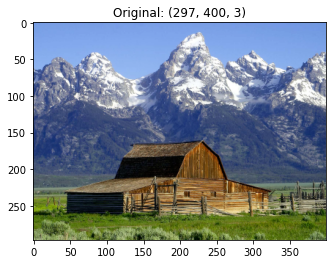

In [89]:
plot_image(image, title=f'Original: {size}')

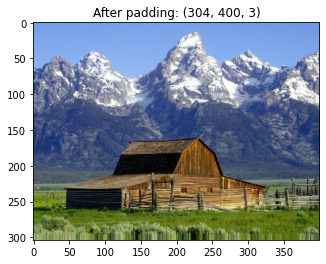

In [90]:
image_with_padding = add_padding(image)
plot_image(image_with_padding, title=f'After padding: {image_with_padding.shape}')

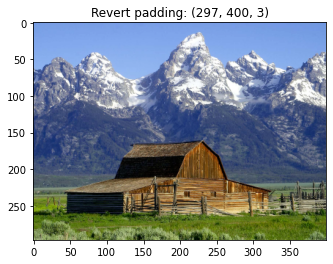

In [91]:
image_reverted_padding = revert_padding(image, size[0], size[1])
plot_image(image_reverted_padding, title=f'Revert padding: {image_reverted_padding.shape}')

## Exercício 5

### Conversão para o modelo cor YCbCr

In [92]:
def convert_rgb_to_ycbcr(image):
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    aux = image.dot(ycbcr_matrix.T)
    aux[:, :, 1:3] += 128
    aux[aux > 255] = 255
    aux[aux < 0] = 0
    aux = aux.round()
    return np.uint8(aux)

In [93]:
def convert_ycbcr_to_rgb(image):
    image = image.astype(np.float32)
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    inverse = np.linalg.inv(ycbcr_matrix.T)
    aux = np.copy(image)
    aux[:, :, 1:3] -= 128
    aux = aux.dot(inverse)
    aux[aux > 255] = 255
    aux[aux < 0] = 0
    aux = aux.round()
    return np.uint8(aux)
    

In [94]:
image_ycbcr = convert_rgb_to_ycbcr(image_with_padding)

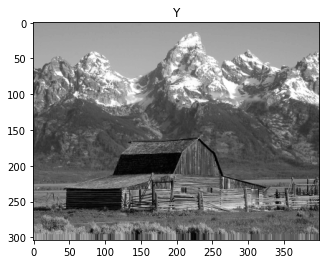

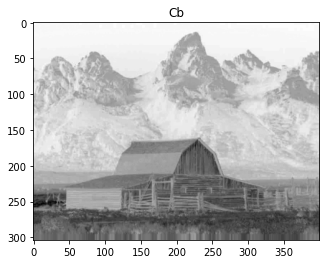

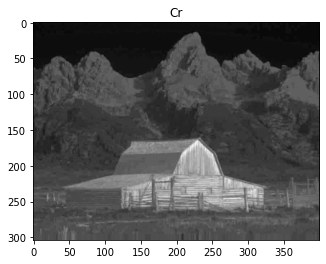

In [95]:
plot_image(image_ycbcr[:, :, 0], title='Y')
plot_image(image_ycbcr[:, :, 1], title='Cb')
plot_image(image_ycbcr[:, :, 2], title='Cr')


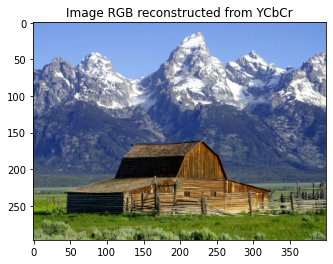

In [96]:
image_revert_ycbcr = convert_ycbcr_to_rgb(image_ycbcr)
plot_image(revert_padding(image_revert_ycbcr, size[0], size[1]), title='Image RGB reconstructed from YCbCr')

No modelo RGB, todos os canais contém luminância. Esta redundância é eliminada no modelo YCbCr, guardando a informação sobre a luminância apenas no canal Y. Os restantes canais, Cb e Cr, guardam a informação acerca da variação de azul e vermelho, respetivamente, relativamente à luma (crominância azul e crominância vermelha). 
Assim sendo, nos canais Cb e Cr é visível um menor detalhe que as torna mais propícias a maiores níveis de compressão.

## Exercício 6

### 6.1.

A função de downsampling foi aplicada apenas aos canais Cb e Cr da imagem, uma vez que as alterações feitas nestes canais não serão tão percetíveis ao olho humano. O canal Y mantém-se inalterado para não perder o detalhe da imagem (luminância).

In [97]:
def downsampling(image, ratio, interpolation=False):
    
    ratios = {
        (4, 4, 4): (1, 1),
        (4, 4, 0): (1, 0.5),
        (4, 2, 2): (0.5, 1),
        (4, 2, 0): (0.5, 0.5),
        (4, 1, 1): (0.25, 1),
        (4, 1, 0): (0.25, 0.25)
    }

    scale_x, scale_y = ratios[ratio]

    if scale_x == 1 and scale_y == 1:
        return (image[:, :, 0], image[:, :, 1], image[:, :, 2])
    
    step_x = int(1//scale_x)
    step_y = int(1//scale_y)
    
    if interpolation:
        return (image[:, :, 0],
                cv2.resize(image[:, :, 1], None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR),
                cv2.resize(image[:, :, 2], None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR))
    else:
        return (image[:, :, 0], image[::step_y, ::step_x, 1], image[::step_y, ::step_x, 2])

In [98]:
def upsampling(y, cb, cr, ratio, interpolation=False):
    ratios = {
        (4, 4, 4): (1, 1),          # multipla de 8
        (4, 4, 0): (1, 0.5),        # multipla de 16
        (4, 2, 2): (0.5, 1),        # multipla de 16
        (4, 2, 0): (0.5, 0.5),      # multipla de 16
        (4, 1, 1): (0.25, 1),       # multipla de 32
        (4, 1, 0): (0.25, 0.25)     # multipla de 32
    }

    scale_x, scale_y = ratios[ratio]

    if scale_x == 1 and scale_y == 1:
        return (y, cb, cr)
    
    step_x = int(1//scale_x)
    step_y = int(1//scale_y)

    if interpolation:
        return (y,
            cv2.resize(cb, None, fx=step_x, fy=step_y, interpolation=cv2.INTER_LINEAR),
            cv2.resize(cr, None, fx=step_x, fy=step_y, interpolation=cv2.INTER_LINEAR))
    else:
        upsampled_cb = np.repeat(cb, step_x, axis=1)
        upsampled_cb = np.repeat(upsampled_cb, step_y, axis=0)

        upsampled_cr = np.repeat(cr, step_x, axis=1)
        upsampled_cr = np.repeat(upsampled_cr, step_y, axis=0)

        return (y, upsampled_cb, upsampled_cr)

### 6.2.

#### 4:2:0

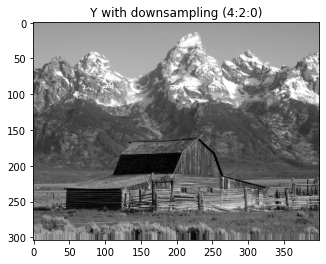

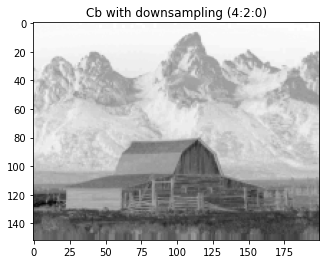

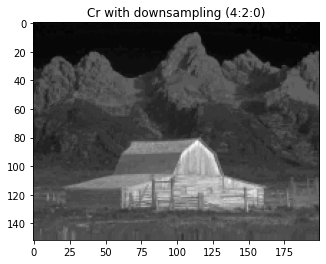

In [99]:
ratio = (4, 2, 0)
y, cb, cr = downsampling(image_ycbcr, ratio, True)
plot_image(y, title="Y with downsampling (4:2:0)")
plot_image(cb, title="Cb with downsampling (4:2:0)")
plot_image(cr, title="Cr with downsampling (4:2:0)")

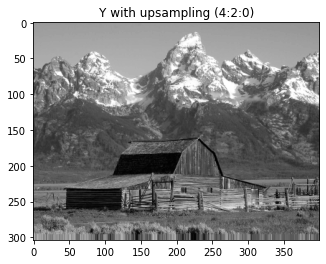

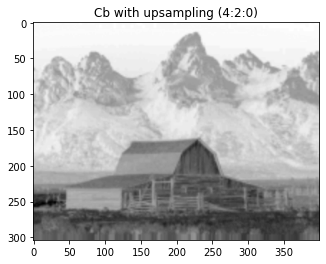

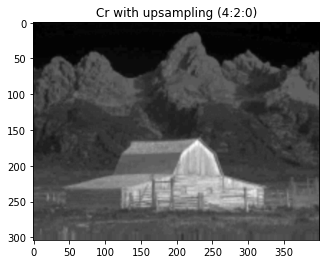

In [100]:
y_upsampling, cb_upsampling, cr_upsampling = upsampling(y, cb, cr, ratio, True)
plot_image(y_upsampling, title="Y with upsampling (4:2:0)")
plot_image(cb_upsampling, title="Cb with upsampling (4:2:0)")
plot_image(cr_upsampling, title="Cr with upsampling (4:2:0)")


Como se pode observar, ao usar o rácio 4:2:0, ou seja, reduzindo o número de colunas e linhas para metade (passo de 2) dos canais Cb e Cr, conseguimos comprimir estes canais para 25% do seu tamanho original. 

Ao utilizar interpolação quer no downsampling quer no upsampling, é possível verificar que a imagem final se aproxima mais da original. Enquanto que, sem interpolação, a imagem final não fica tão suave, notando-se até alguns "degraus", ou seja, perda de alguma informação, especialmente na imagem logo.bmp dado que apresenta maiores constrastes.

#### 4:2:2

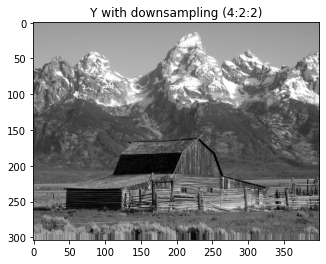

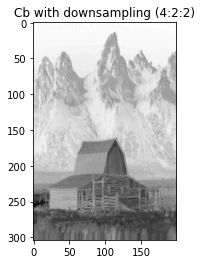

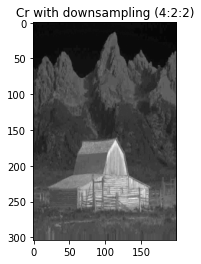

In [101]:
ratio = (4,2,2)
y, cb, cr = downsampling(image_ycbcr, ratio, True)
plot_image(y, title="Y with downsampling (4:2:2)")
plot_image(cb, title="Cb with downsampling (4:2:2)")
plot_image(cr, title="Cr with downsampling (4:2:2)")

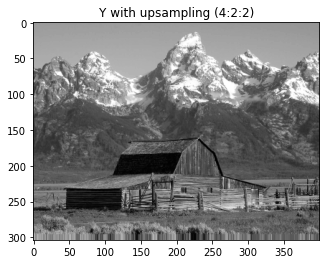

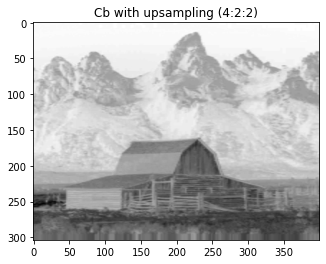

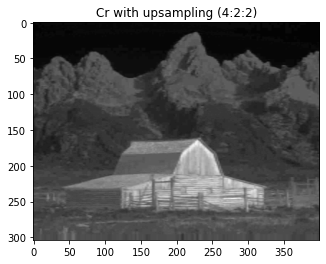

In [102]:
y_upsampling, cb_upsampling, cr_upsampling = upsampling(y, cb, cr, ratio, True)
plot_image(y_upsampling, title="Y with upsampling (4:2:2)")
plot_image(cb_upsampling, title="Cb with upsampling (4:2:2)")
plot_image(cr_upsampling, title="Cr with upsampling (4:2:2)")

Como se pode observar, ao usar o rácio 4:2:2, ou seja, reduzindo o número de colunas para metade (passo de 2) dos canais Cb e Cr, conseguimos comprimir estes canais para 50% do seu tamanho original.

Ao utilizar interpolação quer no downsampling quer no upsampling, é possível verificar que a imagem final se aproxima mais da original, apesar de, na imagem logo.bmp, por não ter muito detalhe (não é foto-realista), apresentar um contorno vermelho mais carregado em volta do círculo. Enquanto que, sem interpolação, a imagem final não fica tão suave, notando-se até alguns "degraus", especialmente na imagem logo.bmp dado que apresenta maiores constrastes. É de realçar, que a imagem, quer com ou sem interpolação, apresenta a mesma taxa de compressão.

Nas imagens foto-realistas, a perda de informação das sub-amostragens não é tão notória quendo comparada com o mesmo tipo de sub-amostragem em imagens gráficas vetoriais.

Comparando os rácios 4:2:0 e 4:2:2, concluí-se que, como era de esperar, o rácio 4:2:0 apresenta piores resultados visualmente que o rácio 4:2:2, quer com interpolação quer sem interpolação. Porém, essas diferenças são minínimas, apenas se distinguíndo mais quando se faz zoom das imagens.

### Exercicio 7.1.1.

In [103]:
def get_dct(channel):
    return fft.dct(fft.dct(channel, norm="ortho").T, norm="ortho").T

In [104]:
def get_inverse_dct(channel):
    return fft.idct(fft.idct(channel, norm="ortho").T, norm="ortho").T

### Exercício 7.1.2.

In [105]:
y_d = get_dct(y)
cb_d = get_dct(cb)
cr_d = get_dct(cr)

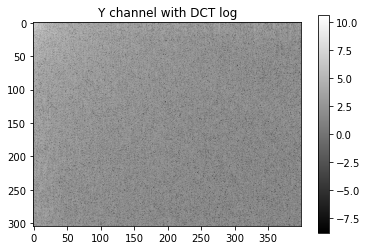

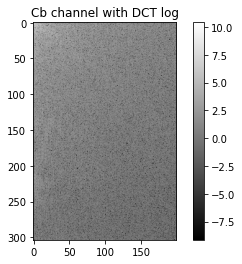

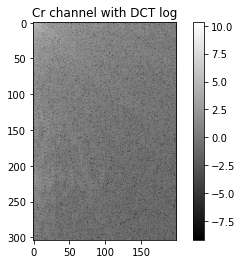

In [106]:
y_d_log = np.log(np.abs(y_d) + 0.0001)
cb_d_log = np.log(np.abs(cb_d) + 0.0001)
cr_d_log = np.log(np.abs(cr_d) + 0.0001)

plot_image_colorbar(y_d_log, title='Y channel with DCT log')
plot_image_colorbar(cb_d_log, title='Cb channel with DCT log')
plot_image_colorbar(cr_d_log, title='Cr channel with DCT log')

In [107]:
def plot_compared_images(image1, image2, title1, title2):
    plt.figure() 
    fig, axs = plt.subplots(1, 2)
    axs[0].set_title(title1)
    axs[0].imshow(image1, graymap)

    axs[1].set_title(title2)
    axs[1].imshow(image2, graymap)
    plt.show()

<Figure size 432x288 with 0 Axes>

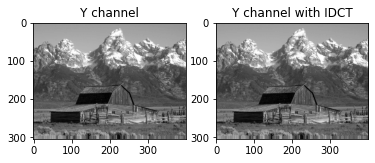

<Figure size 432x288 with 0 Axes>

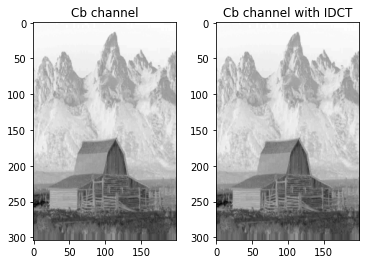

<Figure size 432x288 with 0 Axes>

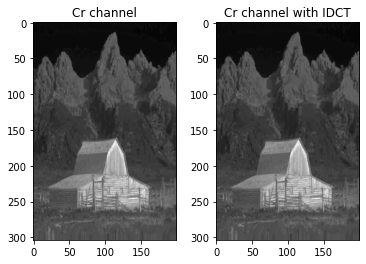

In [108]:
y_di = get_inverse_dct(y_d)
cb_di = get_inverse_dct(cb_d)
cr_di = get_inverse_dct(cr_d)

plot_compared_images(y, y_di, 'Y channel', 'Y channel with IDCT')
plot_compared_images(cb, cb_di, 'Cb channel', 'Cb channel with IDCT')
plot_compared_images(cr, cr_di, 'Cr channel', 'Cr channel with IDCT')

### Exercício 7.1.3

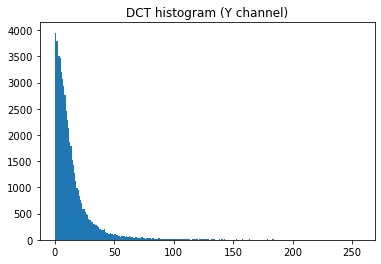

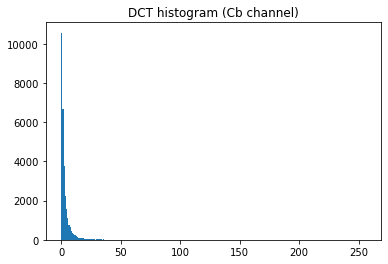

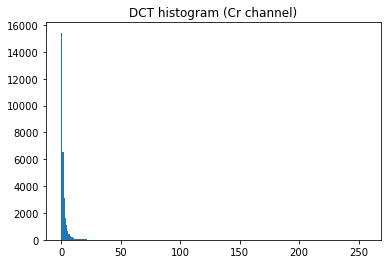

In [109]:
plt.hist(y_d.flatten(),256,[0,256])
plt.title("DCT histogram (Y channel)")
plt.show()
plt.hist(cb_d.flatten(),256,[0,256])
plt.title("DCT histogram (Cb channel)")
plt.show()
plt.hist(cr_d.flatten(),256,[0,256])
plt.title("DCT histogram (Cr channel)")
plt.show()

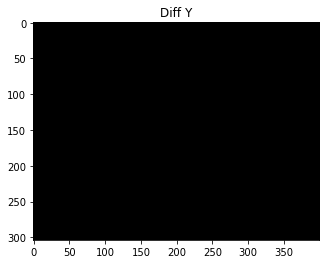

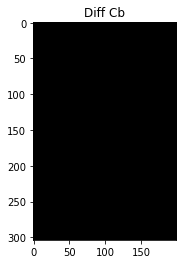

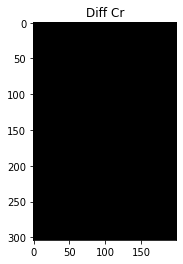

In [110]:
diff_image_y = y_di - y
diff_image_y[diff_image_y < 0.000001] = 0
plot_image(diff_image_y, title = 'Diff Y')

diff_image_cb = cb_di - cb 
diff_image_cb[diff_image_cb < 0.000001] = 0
plot_image(diff_image_cb, title = 'Diff Cb' )

diff_image_cr = cr_di - cr
diff_image_cr[diff_image_cr < 0.000001] = 0
plot_image(diff_image_cr, title = 'Diff Cr')


Ao utilizar a DCT, há uma compactação da energia num número menor de coeficientes. Por este motivo, poderá ser usado um algoritmo de compressão entrópica (RLE, por exemplo) para eliminar a redundância que existe nas altas frequências. Para aumentar ainda mais a redundância nestas frequências, poderá ser usado um processo de quantização para aproximar os valores (este processo vai levar à perda de informação). 

## 7.2

In [111]:
def dct_block(channel, bs):
    """
    This function takes a channel and a block size and returns a dct of the channel in blocks
    
    :param channel: the channel of the image we want to compress
    :param bs: block size
    :return: The DCT coefficients of the image.
    """
    size = channel.shape
    dct = np.zeros(size)
    for i in np.r_[:size[0]:bs]:
        for j in np.r_[:size[1]:bs]:
            dct[i:(i+bs),j:(j+bs)] = get_dct(channel[i:(i+bs),j:(j+bs)])
    return dct

In [112]:
def idct_block(channel, bs):
    """
    This function performs the inverse discrete cosine transform on a block of the image
    
    :param channel: the channel of the image
    :param bs: block size
    :return: The inverse discrete cosine transform of the block.
    """
    size = channel.shape
    idct = np.zeros(size)
    for i in np.r_[:size[0]:bs]:
        for j in np.r_[:size[1]:bs]:
            idct[i:(i+bs),j:(j+bs)] = get_inverse_dct(channel[i:(i+bs),j:(j+bs)])
    idct[idct < 0] = 0
    idct[idct > 255] = 255
    return idct

<Figure size 432x288 with 0 Axes>

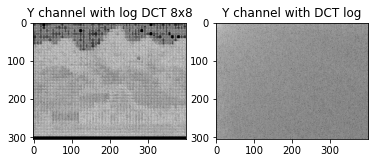

<Figure size 432x288 with 0 Axes>

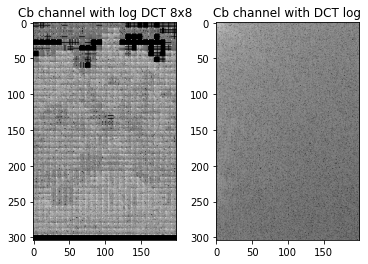

<Figure size 432x288 with 0 Axes>

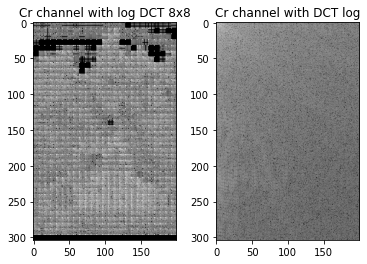

In [113]:
y_d_block_8 = dct_block(y, 8)
cb_d_block_8 = dct_block(cb, 8)
cr_d_block_8 = dct_block(cr, 8)

y_d_block_8_log = np.log(np.abs(y_d_block_8) + 0.0001)
cb_d_block_8_log = np.log(np.abs(cb_d_block_8) + 0.0001)
cr_d_block_8_log = np.log(np.abs(cr_d_block_8) + 0.0001)
plot_compared_images(y_d_block_8_log, y_d_log, "Y channel with log DCT 8x8", "Y channel with DCT log")
plot_compared_images(cb_d_block_8_log, cb_d_log, "Cb channel with log DCT 8x8", "Cb channel with DCT log")
plot_compared_images(cr_d_block_8_log, cr_d_log, "Cr channel with log DCT 8x8", "Cr channel with DCT log")

In [114]:
y_block_8_di = idct_block(y_d_block_8, 8)
cb_block_8_di = idct_block(cb_d_block_8, 8)
cr_block_8_di = idct_block(cr_d_block_8, 8)

<Figure size 432x288 with 0 Axes>

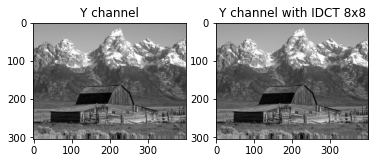

<Figure size 432x288 with 0 Axes>

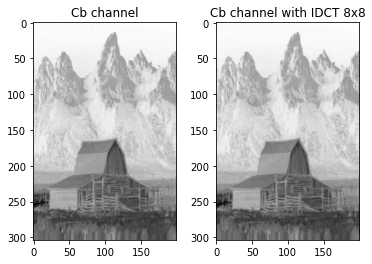

<Figure size 432x288 with 0 Axes>

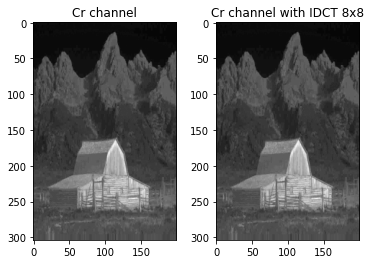

<Figure size 432x288 with 0 Axes>

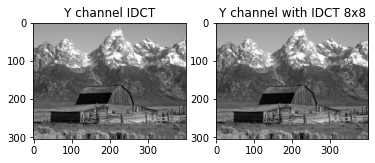

<Figure size 432x288 with 0 Axes>

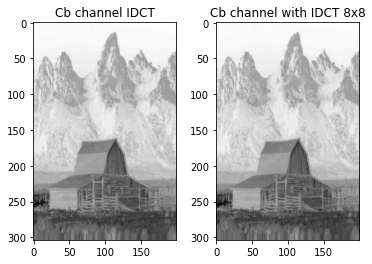

<Figure size 432x288 with 0 Axes>

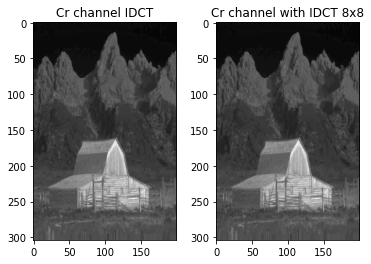

In [115]:
plot_compared_images(y, y_block_8_di, 'Y channel', 'Y channel with IDCT 8x8')
plot_compared_images(cb, cb_block_8_di, 'Cb channel', 'Cb channel with IDCT 8x8')
plot_compared_images(cr, cr_block_8_di,'Cr channel', 'Cr channel with IDCT 8x8')

plot_compared_images(y_di, y_block_8_di, 'Y channel IDCT', 'Y channel with IDCT 8x8')
plot_compared_images(cb_di, cb_block_8_di, 'Cb channel IDCT', 'Cb channel with IDCT 8x8')
plot_compared_images(cr_di, cr_block_8_di, 'Cr channel IDCT', 'Cr channel with IDCT 8x8')

Em blocos 8x8, existe uma menor probabilidade de encontrar transições abruptas. Deste modo, ao aplicar a DCT a estes blocos, os valores AC tendem a proximar-se de zero enquanto que o valor DC se distingue mais desses devido à ausência de frequências altas.
Como os valores AC são semelhantes e próximos de zero, consegue-se comprimir mais a imagem através de métodos entrópicos que tiram partido deste aspeto.

### Exercício 7.3.

<Figure size 432x288 with 0 Axes>

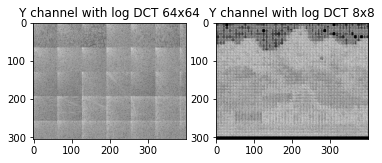

<Figure size 432x288 with 0 Axes>

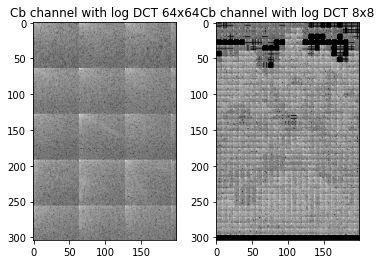

<Figure size 432x288 with 0 Axes>

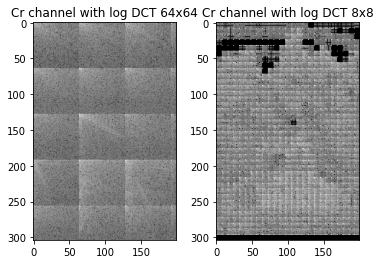

In [116]:
y_d_block_64 = dct_block(y, 64)
cb_d_block_64 = dct_block(cb, 64)
cr_d_block_64 = dct_block(cr, 64)

y_d_block_64_log = np.log(np.abs(y_d_block_64) + 0.0001)
cb_d_block_64_log = np.log(np.abs(cb_d_block_64) + 0.0001)
cr_d_block_64_log = np.log(np.abs(cr_d_block_64) + 0.0001)
plot_compared_images(y_d_block_64_log, y_d_block_8_log, "Y channel with log DCT 64x64", "Y channel with log DCT 8x8")
plot_compared_images(cb_d_block_64_log, cb_d_block_8_log, "Cb channel with log DCT 64x64", "Cb channel with log DCT 8x8")
plot_compared_images(cr_d_block_64_log, cr_d_block_8_log, "Cr channel with log DCT 64x64", "Cr channel with log DCT 8x8")

In [117]:
y_block_64_di = idct_block(y_d_block_64, 64)
cb_block_64_di = idct_block(cb_d_block_64, 64)
cr_block_64_di = idct_block(cr_d_block_64, 64)

<Figure size 432x288 with 0 Axes>

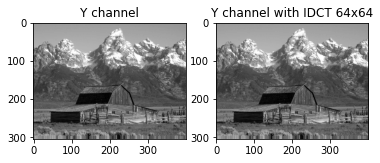

<Figure size 432x288 with 0 Axes>

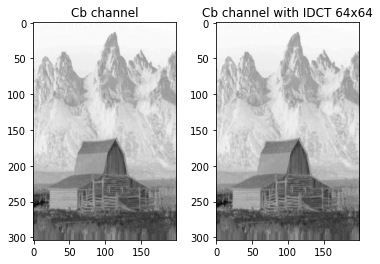

<Figure size 432x288 with 0 Axes>

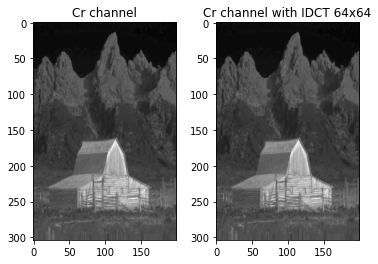

<Figure size 432x288 with 0 Axes>

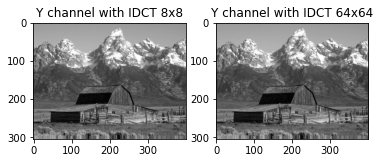

<Figure size 432x288 with 0 Axes>

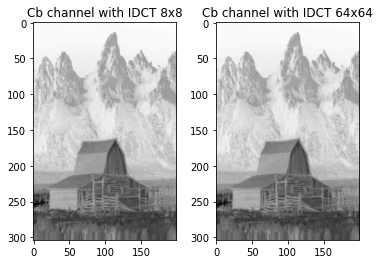

<Figure size 432x288 with 0 Axes>

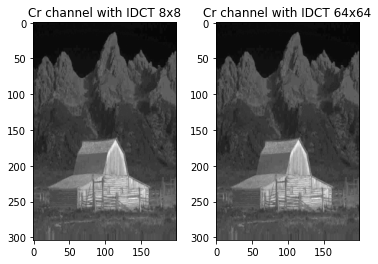

In [118]:
plot_compared_images(y, y_block_64_di, 'Y channel', 'Y channel with IDCT 64x64')
plot_compared_images(cb, cb_block_64_di, 'Cb channel', 'Cb channel with IDCT 64x64')
plot_compared_images(cr, cr_block_64_di,'Cr channel', 'Cr channel with IDCT 64x64')

plot_compared_images(y_block_8_di, y_block_64_di, 'Y channel with IDCT 8x8', 'Y channel with IDCT 64x64')
plot_compared_images(cb_block_8_di, cb_block_64_di, 'Cb channel with IDCT 8x8', 'Cb channel with IDCT 64x64')
plot_compared_images(cr_block_8_di, cr_block_64_di,'Cr channel with IDCT 8x8', 'Cr channel with IDCT 64x64')

Aumentando o tamanho dos blocos para 64x64, verifica-se que há mais probabilidade de apanhar transições abruptas na imagem do que em blocos 8x8. Assim, haverá mais discrepâncias entre os valores AC dos blocos e ,consequentemente, serão mais difícies de comprimir com modelos entrópicos.

## Exercício 8

In [141]:
def apply_quantization_block(channel, factor):
    """
    Given a channel, apply quantization by dividing each 8x8 block by a factor and rounding the result
    
    :param channel: the channel to be quantized
    :param factor: the quantization factor
    :return: The quantized image.
    """
    size = channel.shape
    quant = np.zeros(size, dtype=np.float32)
    for i in np.r_[:size[0]:8]:
        for j in np.r_[:size[1]:8]:
            quant[i:(i+8),j:(j+8)] = np.round(channel[i:(i+8),j:(j+8)] / factor)
    return quant

In [142]:
def apply_quantization_block_inverse(channel, factor):
    size = channel.shape
    inverse_quant = np.zeros(size, dtype=np.float32)
    for i in np.r_[:size[0]:8]:
        for j in np.r_[:size[1]:8]:
            inverse_quant[i:(i+8),j:(j+8)] = channel[i:(i+8),j:(j+8)] * factor
    return inverse_quant

In [143]:
def calculate_quantization_factor(quality):
    if quality > 100:
        quality = 100
    if quality < 0:
        quality = 1
    qy = np.array([[16, 11, 10, 16,  24,  40,  51,  61],
               [12, 12, 14, 19,  26,  58,  60,  55],
               [14, 13, 16, 24,  40,  57,  69,  56],
               [14, 17, 22, 29,  51,  87,  80,  62],
               [18, 22, 37, 56,  68, 109, 103,  77],
               [24, 35, 55, 64,  81, 104, 113,  92],
               [49, 64, 78, 87, 103, 121, 120, 101],
               [72, 92, 95, 98, 112, 100, 103,  99]])
    qc = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
               [18, 21, 26, 66, 99, 99, 99, 99],
               [24, 26, 56, 99, 99, 99, 99, 99],
               [47, 66, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99],
               [99, 99, 99, 99, 99, 99, 99, 99]])
    q_ones = np.ones((8, 8))
    scaling_factor = 0
    if quality >= 50:
        scaling_factor = (100 - quality) / 50
    else:
        scaling_factor = 50 / quality
    
    qy_factor = q_ones
    qc_factor = q_ones

    if scaling_factor != 0:
        qy_factor = np.round(qy * scaling_factor)
        qc_factor = np.round(qc * scaling_factor)
    
    qy_factor[qy_factor > 255] = 255
    qc_factor[qc_factor > 255] = 255
    qy_factor[qy_factor < 1] = 1
    qc_factor[qc_factor < 1] = 1
    
    return (qy_factor, qc_factor)

In [144]:
def quantization(y, cb, cr, quality=75):
    qy_factor, qc_factor = calculate_quantization_factor(quality)
    return (apply_quantization_block(y, qy_factor), apply_quantization_block(cb, qc_factor), apply_quantization_block(cr, qc_factor))


In [145]:
def inverse_quantization(y, cb, cr, quality=75):
    qy_factor, qc_factor = calculate_quantization_factor(quality)
    return (apply_quantization_block_inverse(y, qy_factor), apply_quantization_block_inverse(cb, qc_factor), apply_quantization_block_inverse(cr, qc_factor))

<Figure size 432x288 with 0 Axes>

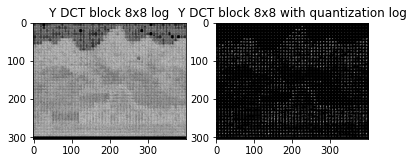

<Figure size 432x288 with 0 Axes>

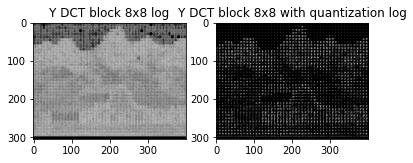

<Figure size 432x288 with 0 Axes>

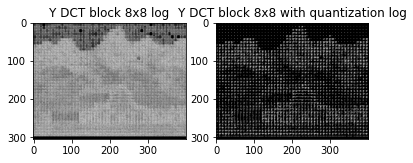

<Figure size 432x288 with 0 Axes>

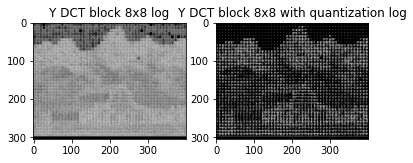

<Figure size 432x288 with 0 Axes>

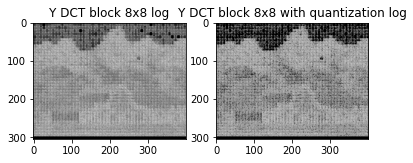

In [146]:
quality = 10
y_quant, cb_quant, cr_quant = quantization(y_d_block_8, cb_d_block_8, cr_d_block_8, quality)
plot_compared_images(np.log(np.abs(y_d_block_8) + 0.001),np.log(np.abs(y_quant) + 0.001), 'Y DCT block 8x8 log', 'Y DCT block 8x8 with quantization log')

quality = 25
y_quant, cb_quant, cr_quant = quantization(y_d_block_8, cb_d_block_8, cr_d_block_8, quality)
plot_compared_images(np.log(np.abs(y_d_block_8) + 0.001),np.log(np.abs(y_quant) + 0.001), 'Y DCT block 8x8 log', 'Y DCT block 8x8 with quantization log')

quality = 50
y_quant, cb_quant, cr_quant = quantization(y_d_block_8, cb_d_block_8, cr_d_block_8, quality)
plot_compared_images(np.log(np.abs(y_d_block_8) + 0.001),np.log(np.abs(y_quant) + 0.001), 'Y DCT block 8x8 log', 'Y DCT block 8x8 with quantization log')

quality = 75
y_quant, cb_quant, cr_quant = quantization(y_d_block_8, cb_d_block_8, cr_d_block_8, quality)
plot_compared_images(np.log(np.abs(y_d_block_8) + 0.001),np.log(np.abs(y_quant) + 0.001), 'Y DCT block 8x8 log', 'Y DCT block 8x8 with quantization log')

quality = 100
y_quant, cb_quant, cr_quant = quantization(y_d_block_8, cb_d_block_8, cr_d_block_8, quality)
plot_compared_images(np.log(np.abs(y_d_block_8) + 0.001),np.log(np.abs(y_quant) + 0.001), 'Y DCT block 8x8 log', 'Y DCT block 8x8 with quantization log')


Pelos gráficos anteriores, é possível verificar que quanto menor a qualidade aplicada, mais informação se perde, dado que, a maioria dos valores resultantes da quantização   

<Figure size 432x288 with 0 Axes>

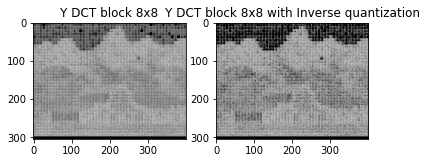

In [147]:
y_quant_inv, cb_quant_inv, cr_quant_inv = inverse_quantization(y_quant, cb_quant, cr_quant, quality)
plot_compared_images(np.log(np.abs(y_d_block_8) + 0.001), np.log(np.abs(y_quant_inv) + 0.001), 'Y DCT block 8x8', 'Y DCT block 8x8 with Inverse quantization')

## Exercicio 9

In [170]:
def dpcm(channel):
    size = channel.shape
    dpcm_image = copy.deepcopy(channel.astype(np.float32))
    prev = channel[0, 0]
    for i in np.r_[:size[0]:8]:
        for j in np.r_[:size[1]:8]:
            if i == 0 and j == 0:
                continue
            dc = channel[i, j]
            dpcm_image[i, j] = dc - prev
            prev = dc

    return dpcm_image

In [171]:
def idpcm(channel):
    size = channel.shape
    image = copy.deepcopy(channel.astype(dtype=np.float32))
    prev = channel[0, 0]
    for i in np.r_[:size[0]:8]:
        for j in np.r_[:size[1]:8]:
            if i == 0 and j == 0:
                continue
            image[i, j] = channel[i, j] + prev
            prev = image[i, j]

    return image

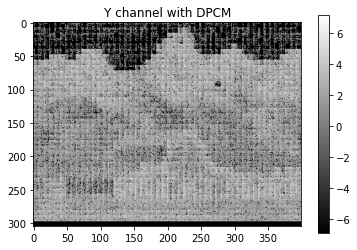

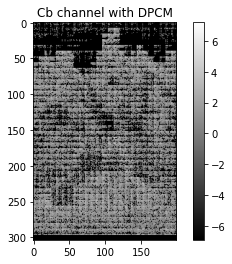

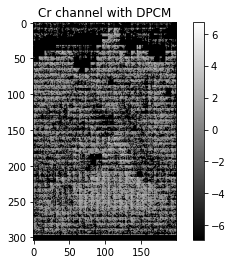

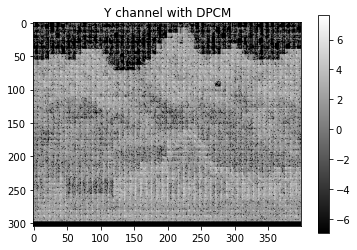

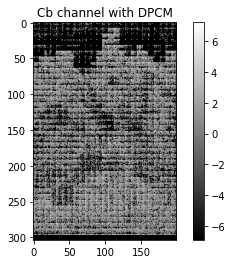

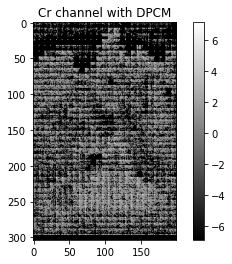

In [172]:
y_dpcm = dpcm(y_quant)
cb_dpcm = dpcm(cb_quant)
cr_dpcm = dpcm(cr_quant)

plot_image_colorbar(np.log(np.abs(y_dpcm) + 0.001), title="Y channel with DPCM")
plot_image_colorbar(np.log(np.abs(cb_dpcm) + 0.001), title="Cb channel with DPCM")
plot_image_colorbar(np.log(np.abs(cr_dpcm) + 0.001), title="Cr channel with DPCM")

y_idpcm = idpcm(y_dpcm)
cb_idpcm = idpcm(cb_dpcm)
cr_idpcm = idpcm(cr_dpcm)

plot_image_colorbar(np.log(np.abs(y_idpcm) + 0.001), title="Y channel with DPCM")
plot_image_colorbar(np.log(np.abs(cb_idpcm) + 0.001), title="Cb channel with DPCM")
plot_image_colorbar(np.log(np.abs(cr_idpcm) + 0.001), title="Cr channel with DPCM")

Aos aplicar a DPCM por blocos, como estamos perante uma imagem com transições suaves, a diferença entre os coeficientes DC codificados de pixeis adjacentes irá ser perto de zero. Assim sendo, irá haver uma maior proximidade entre os valores, resultando, em termos visuais, numa menor transição entre tonalidades, contrastando com o resultado obtido na alínea anterior, depois de aplicar a quantitização. Estes resultados irão possibilitar uma maior compressão, sobretudo ao aplicar métodos de compressão entrópica como Huffman.

### Reconstruct original image

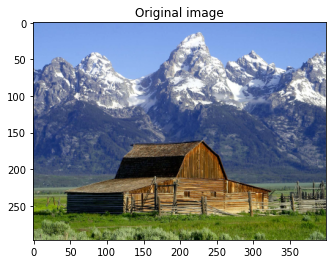

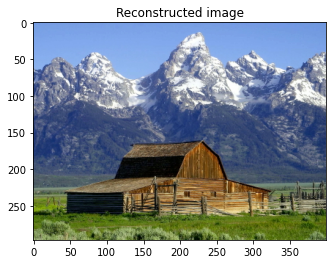

In [173]:
y_quant_inv, cb_quant_inv, cr_quant_inv = inverse_quantization(y_idpcm, cb_idpcm, cr_idpcm, quality)
y_quant_idct_inv = idct_block(y_quant_inv, 8)
cb_quant_idct_inv = idct_block(cb_quant_inv, 8)
cr_quant_idct_inv = idct_block(cr_quant_inv, 8)

y_upsampling, cb_upsampling, cr_upsampling = upsampling(y_quant_idct_inv, cb_quant_idct_inv, cr_quant_idct_inv, ratio, True)
reconstructed_image = get_image_from_channels((y_upsampling, cb_upsampling, cr_upsampling))
reconstructed_image = revert_padding(reconstructed_image, size[0], size[1])

reconstructed_image = convert_ycbcr_to_rgb(reconstructed_image)
plot_image(image, title='Original image')
plot_image(reconstructed_image, title="Reconstructed image")

## Exercício 2

In [174]:
def encoder(original, ratio, interpolation, quality=75):
    #plot_image(original, title="Original image")
    shape = original[:, :, 0].shape
    image = add_padding(original)
    image = convert_rgb_to_ycbcr(image)
    y, cb, cr = downsampling(image, ratio, interpolation)
    y_d = dct_block(y, 8)
    cb_d = dct_block(cb, 8)
    cr_d = dct_block(cr, 8)

    y_quant, cb_quant, cr_quant = quantization(y_d, cb_d, cr_d, quality)
    y_dpcm = dpcm(y_quant)
    cb_dpcm = dpcm(cb_quant)
    cr_dpcm = dpcm(cr_quant)

    return (y_dpcm, cb_dpcm, cr_dpcm), shape

In [175]:
def decoder(channels, size, ratio, interpolation, quality=75):
    y_idpcm = idpcm(channels[0])
    cb_idpcm = idpcm(channels[1])
    cr_idpcm = idpcm(channels[2])

    y_iquant, cb_iquant, cr_iquant = inverse_quantization(y_idpcm, cb_idpcm, cr_idpcm, quality)

    y_di = idct_block(y_iquant, 8)
    cb_di = idct_block(cb_iquant, 8)
    cr_di = idct_block(cr_iquant, 8)
    y, cb, cr = upsampling(y_di, cb_di, cr_di, ratio, interpolation)
    image = get_image_from_channels((y, cb, cr))
    image = convert_ycbcr_to_rgb(image)
    image = revert_padding(image, size[0], size[1])
    #plot_image(image, title="Reconstructed Image")

    return image

In [176]:
def mse_error(original, reconstructed):
    size = original.shape
    mse = (1 / (size[0] * size[1])) * np.sum(np.power((original - reconstructed), 2))
    return mse

In [177]:
def rmse_error(mse):
    return m.sqrt(mse)

In [178]:
def snr_error(original, mse):
    size = original.shape
    p = (1/(size[0] * size[1])) * np.sum(np.power(original, 2))
    return 10 * m.log10(p / mse)

In [179]:
def psnr_error(original, mse):
    return 10 * m.log10((np.max(original)**2) / mse)

In [190]:
def compare_results(image_name, quality):
    interpolation = False
    ratio = (4, 2, 0)
    original = read_image(f"./imagens/{image_name}.bmp")
    channels, shape = encoder(original, ratio, interpolation, quality)
    original_ycbcr = convert_rgb_to_ycbcr(original)
    image_r = decoder(channels, shape, ratio, interpolation, quality)
    plot_image(image_r, title=f"Quality: {quality}")
    img.imsave(f"{image_name}_{quality}.png", image_r)
    image_r_ycbcr = convert_rgb_to_ycbcr(image_r)

    plt.figure()
    diff_image = np.abs(original_ycbcr[:, : , 0].astype(np.int16) - image_r_ycbcr[:, :, 0].astype(np.int16)).astype(np.uint8)
    diff_image[0, 0] = 255
    plot_image(diff_image, title=f'Image {image_name} Quality: {quality}')
    mse = mse_error(original.astype(np.float32), image_r.astype(np.float32))
    print("Diff Image: " + image_name + " Quality: " + str(quality))
    print("MSE: " + str(mse))
    print("RMSE: " + str(rmse_error(mse)))
    print("SNR: " + str(snr_error(original.astype(np.float32), mse)))
    print("PSNR: " + str(psnr_error(original.astype(np.float32), mse)))


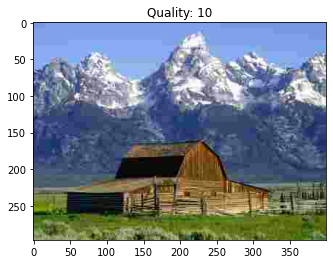

<Figure size 432x288 with 0 Axes>

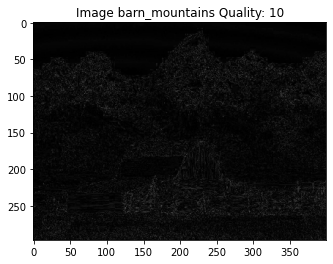

Diff Image: barn_mountains Quality: 10
MSE: 746.9398653198652
RMSE: 27.33020060884781
SNR: 18.45342027332363
PSNR: 19.397947218517164


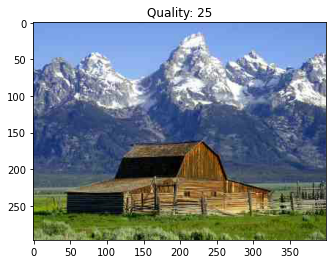

<Figure size 432x288 with 0 Axes>

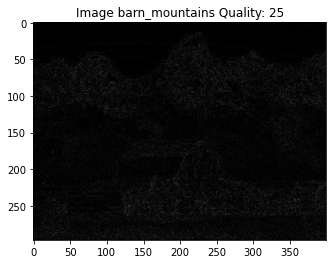

Diff Image: barn_mountains Quality: 25
MSE: 433.41010101010096
RMSE: 20.818503812956898
SNR: 20.817286376254206
PSNR: 21.76181332144774


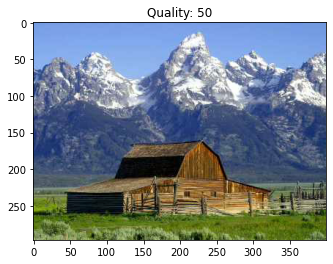

<Figure size 432x288 with 0 Axes>

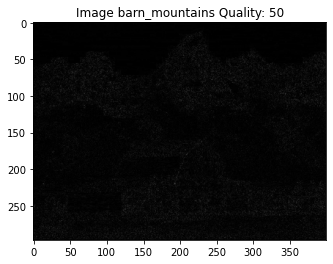

Diff Image: barn_mountains Quality: 50
MSE: 296.19717171717167
RMSE: 17.21037976679108
SNR: 22.4704675906914
PSNR: 23.414994535884937


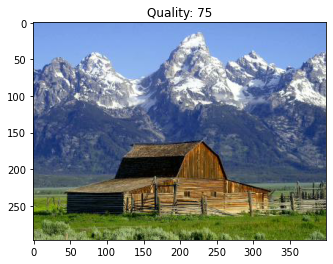

<Figure size 432x288 with 0 Axes>

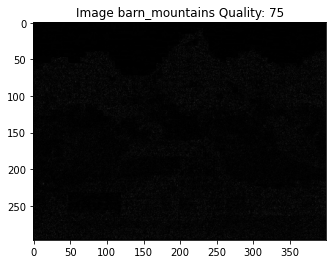

Diff Image: barn_mountains Quality: 75
MSE: 190.62340067340065
RMSE: 13.806643352871857
SNR: 24.384514533646104
PSNR: 25.329041478839642


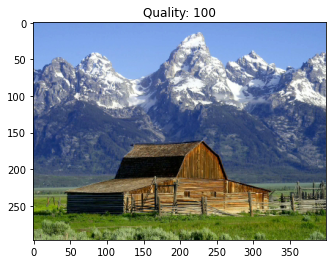

<Figure size 432x288 with 0 Axes>

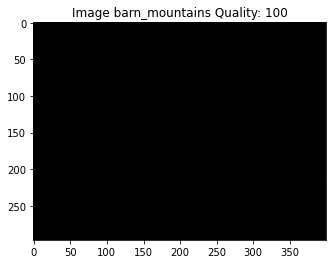

Diff Image: barn_mountains Quality: 100
MSE: 59.72268518518518
RMSE: 7.7280453664031485
SNR: 29.424883405893972
PSNR: 30.369410351087502


In [191]:
compare_results("barn_mountains", 10)
compare_results("barn_mountains", 25)
compare_results("barn_mountains", 50)
compare_results("barn_mountains", 75)
compare_results("barn_mountains", 100)

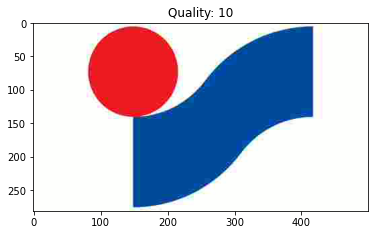

<Figure size 432x288 with 0 Axes>

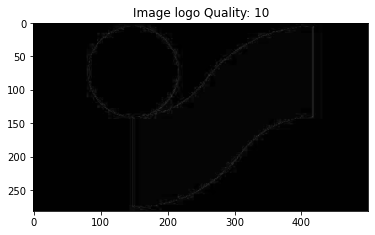

Diff Image: logo Quality: 10
MSE: 226.3775658362989
RMSE: 15.045848790822633
SNR: 27.783785351470943
PSNR: 24.58246975084256


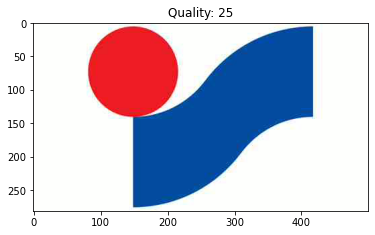

<Figure size 432x288 with 0 Axes>

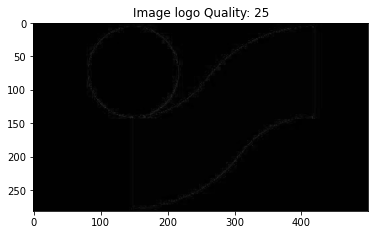

Diff Image: logo Quality: 25
MSE: 112.15037722419929
RMSE: 10.590107517121783
SNR: 30.834111822350106
PSNR: 27.632796221721723


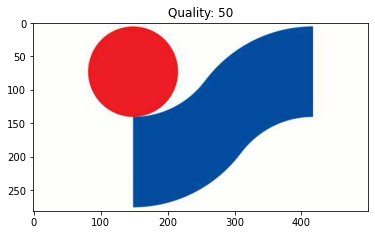

<Figure size 432x288 with 0 Axes>

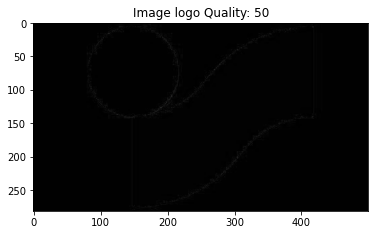

Diff Image: logo Quality: 50
MSE: 91.02922419928825
RMSE: 9.540923655458535
SNR: 31.740310794782992
PSNR: 28.53899519415461


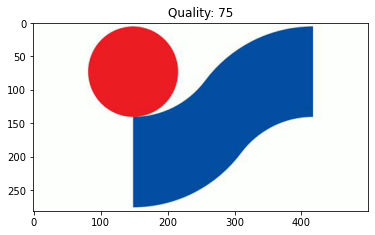

<Figure size 432x288 with 0 Axes>

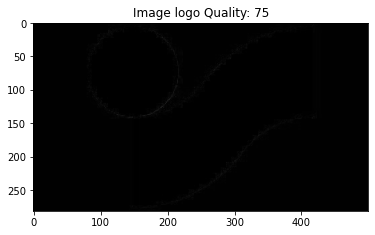

Diff Image: logo Quality: 75
MSE: 72.52864056939501
RMSE: 8.516374849041991
SNR: 32.727023835316416
PSNR: 29.525708234688032


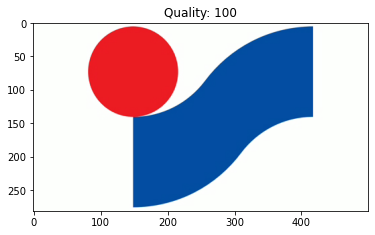

<Figure size 432x288 with 0 Axes>

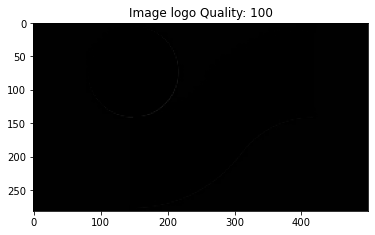

Diff Image: logo Quality: 100
MSE: 52.07978647686833
RMSE: 7.216632627262408
SNR: 34.16542725941042
PSNR: 30.964111658782038


In [192]:
compare_results("logo", 10)
compare_results("logo", 25)
compare_results("logo", 50)
compare_results("logo", 75)
compare_results("logo", 100)

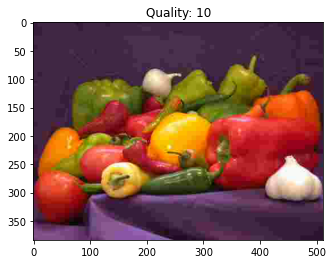

<Figure size 432x288 with 0 Axes>

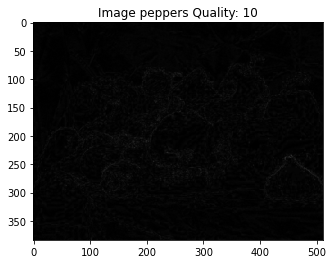

Diff Image: peppers Quality: 10
MSE: 131.2330322265625
RMSE: 11.455698679109995
SNR: 23.745520934674595
PSNR: 26.950371972603282


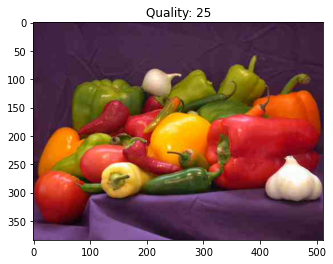

<Figure size 432x288 with 0 Axes>

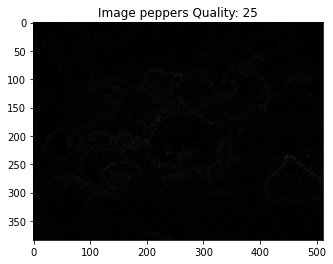

Diff Image: peppers Quality: 25
MSE: 67.75221761067708
RMSE: 8.231173525729917
SNR: 26.616717423209487
PSNR: 29.821568461138174


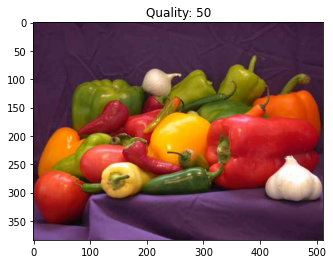

<Figure size 432x288 with 0 Axes>

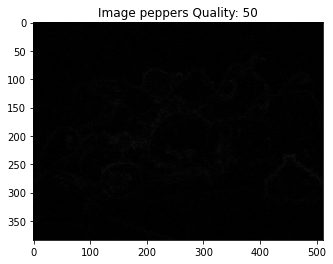

Diff Image: peppers Quality: 50
MSE: 48.44703674316406
RMSE: 6.960390559671494
SNR: 28.073280384426198
PSNR: 31.278131422354885


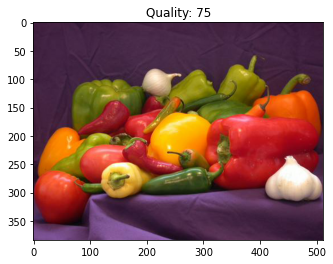

<Figure size 432x288 with 0 Axes>

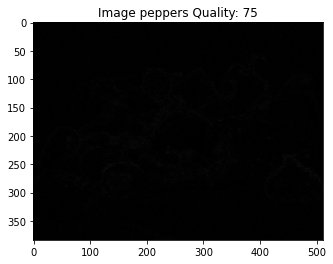

Diff Image: peppers Quality: 75
MSE: 38.15502421061198
RMSE: 6.176975328638765
SNR: 29.110435236104173
PSNR: 32.315286274032864


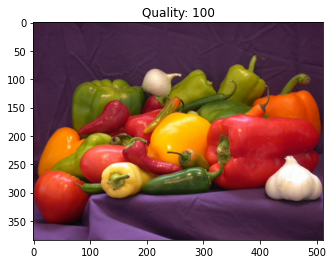

<Figure size 432x288 with 0 Axes>

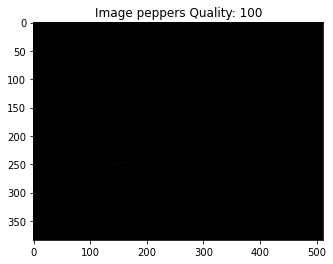

Diff Image: peppers Quality: 100
MSE: 23.646769205729164
RMSE: 4.86279438242346
SNR: 31.188234444313004
PSNR: 34.393085482241695


In [188]:
compare_results("peppers", 10)
compare_results("peppers", 25)
compare_results("peppers", 50)
compare_results("peppers", 75)
compare_results("peppers", 100)

### Resultados do encoder com interpolação e racio 4:2:2

| | Original | 100% | 75% | 50% | 25% | 10% |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/barn_mountains.bmp' width=400 heigh=200/> |<img src='./barn_mountains_100.png' width=400 heigh=200/>  | <img src='./barn_mountains_75.png' width=400 heigh=200/>| <img src='./barn_mountains_50.png' width=400 heigh=200/> |<img src='./barn_mountains_25.png' width=400 heigh=200/> | <img src='./barn_mountains_10.png' width=400 heigh=200/> | 
| MSE | -- | 14.49 | 152.84 | 261.87 | 398.95 | 706.87 |
| RMSE | -- | 3.81 | 12.36 | 16.18 | 19.97 | 26.59 |
| SNR | -- | 35.57 | 25.34 | 23.01 | 21.18 | 18.69 |
| PSNR | -- | 36.52 | 26.29 | 23.95 | 22.12 | 19.63 |

| | Original | 100% | 75% | 50% | 25% | 10% |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/peppers.bmp' width=400 heigh=200/> |<img src='./peppers_100.png' width=400 heigh=200/>  | <img src='./peppers_75.png' width=400 heigh=200/>| <img src='./peppers_50.png' width=400 heigh=200/> |<img src='./peppers_25.png' width=400 heigh=200/> | <img src='./peppers_10.png' width=400 heigh=200/> | 
| MSE | -- | 10.90 | 51.08 | 77.76 | 126.31 | 278.71 |
| RMSE | -- | 3.20 | 7.15 | 8.82 | 11.23 | 16.69 |
| SNR | -- | 34.55 | 27.84 | 26.02 | 23.91 | 20.47 |
| PSNR | -- | 37.76 | 31.05 | 29.22 | 27.12| 23.68 |

| | Original | 100% | 75% | 50% | 25% | 10% |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/logo.bmp' width=400 heigh=200/> |<img src='./logo_100.png' width=400 heigh=200/>  | <img src='./logo_75.png' width=400 heigh=200/>| <img src='./logo_50.png' width=400 heigh=200/> |<img src='./logo_25.png' width=400 heigh=200/> | <img src='./logo_10.png' width=400 heigh=200/> | 
| MSE | -- | 6.70 | 24.28 | 48.41 | 70.86 | 170.45 |
| RMSE | -- | 2.59 | 4.93 | 6.96 | 8.41 | 13.06 |
| SNR | -- | 43.07 | 37.48 | 34.48 | 32.83 | 29.02 |
| PSNR | -- | 39.87 | 34.28 | 31.28 | 29.63 | 25.81 |

Pela visualização das imagens das diferenças para as várias qualidades, podemos verificar que existe uma maior perda de informação nas qualidades inferiores. Esta perda diminui à medida que aumentamos a qualidade da quantitização.
Na imagem descodificada com qualidade 75 não conseguimos visualizar nenhuma perda percetual, e que, na imagem das diferença, a perda é quase nula.
Com uma qualide de 50, já dá para visualizar melhor essa perda, dá para ver algum ruído nos contornos das imagens. Principalmente no logo já dá para ver umas falhas interior do círculo vermelho e na faixa azul, perto do contorno.

In [189]:
! jupyter nbconvert --to html TP1.ipynb

[NbConvertApp] Converting notebook TP1.ipynb to html
[NbConvertApp] Writing 9038842 bytes to TP1.html
